In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | dabakala
Processing Record 5 of Set 1 | anar darreh
City not found. Skipping...
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | talnakh
Processing Record 9 of Set 1 | erdenet
Processing Record 10 of Set 1 | tupaciguara
Processing Record 11 of Set 1 | lebanon
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | wanaka
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | kulotino
Processing Record 16 of Set 1 | veinticinco de mayo
Processing Record 17 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | buraydah
Processing Record 20 of Set 1 | ilulissat
Processing Record 21 of Set 1 | carnarvon
Process

Processing Record 40 of Set 4 | zhezkazgan
Processing Record 41 of Set 4 | presidente epitacio
Processing Record 42 of Set 4 | gimli
Processing Record 43 of Set 4 | beringovskiy
Processing Record 44 of Set 4 | khatanga
Processing Record 45 of Set 4 | holzminden
Processing Record 46 of Set 4 | gazojak
Processing Record 47 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 48 of Set 4 | cururupu
Processing Record 49 of Set 4 | new waterford
Processing Record 50 of Set 4 | dingle
Processing Record 1 of Set 5 | ukiah
Processing Record 2 of Set 5 | daru
Processing Record 3 of Set 5 | talakan
Processing Record 4 of Set 5 | hobyo
Processing Record 5 of Set 5 | qaanaaq
Processing Record 6 of Set 5 | katsina
Processing Record 7 of Set 5 | bruck an der leitha
Processing Record 8 of Set 5 | lorengau
Processing Record 9 of Set 5 | ngukurr
City not found. Skipping...
Processing Record 10 of Set 5 | beloha
Processing Record 11 of Set 5 | ashington
Processing Record 12 of Set 5 | p

City not found. Skipping...
Processing Record 25 of Set 8 | aswan
Processing Record 26 of Set 8 | griffith
Processing Record 27 of Set 8 | te anau
Processing Record 28 of Set 8 | banda aceh
Processing Record 29 of Set 8 | santa rosa
Processing Record 30 of Set 8 | ribeira grande
Processing Record 31 of Set 8 | saravan
Processing Record 32 of Set 8 | sisimiut
Processing Record 33 of Set 8 | del rio
Processing Record 34 of Set 8 | steinbach
Processing Record 35 of Set 8 | dalvik
Processing Record 36 of Set 8 | monrovia
Processing Record 37 of Set 8 | tabou
Processing Record 38 of Set 8 | sakakah
Processing Record 39 of Set 8 | cap malheureux
Processing Record 40 of Set 8 | lavrentiya
Processing Record 41 of Set 8 | esil
Processing Record 42 of Set 8 | drumheller
Processing Record 43 of Set 8 | barawe
City not found. Skipping...
Processing Record 44 of Set 8 | gravelbourg
Processing Record 45 of Set 8 | aquiraz
Processing Record 46 of Set 8 | privolzhskiy
Processing Record 47 of Set 8 | t

Processing Record 5 of Set 12 | mikumi
Processing Record 6 of Set 12 | ijaki
City not found. Skipping...
Processing Record 7 of Set 12 | atar
Processing Record 8 of Set 12 | kadykchan
City not found. Skipping...
Processing Record 9 of Set 12 | labuhan
Processing Record 10 of Set 12 | jarjis
City not found. Skipping...
Processing Record 11 of Set 12 | sonoita
Processing Record 12 of Set 12 | viby
Processing Record 13 of Set 12 | yumen
Processing Record 14 of Set 12 | darhan
Processing Record 15 of Set 12 | ebolowa
Processing Record 16 of Set 12 | hirakud
Processing Record 17 of Set 12 | waingapu
Processing Record 18 of Set 12 | sorland
Processing Record 19 of Set 12 | magole
Processing Record 20 of Set 12 | kosh-agach
Processing Record 21 of Set 12 | port said
Processing Record 22 of Set 12 | truro
Processing Record 23 of Set 12 | qasigiannguit
Processing Record 24 of Set 12 | tazovskiy
Processing Record 25 of Set 12 | newport
Processing Record 26 of Set 12 | altay
Processing Record 27 

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,63.09,80,40,7.07,ZA,2021-05-24 19:27:45
1,Ushuaia,-54.8000,-68.3000,33.46,93,75,18.41,AR,2021-05-24 19:25:03
2,Yellowknife,62.4560,-114.3525,41.56,38,1,5.99,CA,2021-05-24 19:25:03
3,Dabakala,8.3667,-4.4333,88.84,47,97,5.01,CI,2021-05-24 19:27:46
4,Rikitea,-23.1203,-134.9692,76.28,83,100,19.24,PF,2021-05-24 19:27:47
5,Puerto Ayora,-0.7393,-90.3518,84.16,86,50,5.99,EC,2021-05-24 19:27:47
6,Talnakh,69.4865,88.3972,29.66,93,100,19.10,RU,2021-05-24 19:27:47
7,Erdenet,49.0333,104.0833,43.27,90,100,2.66,MN,2021-05-24 19:27:48
8,Tupaciguara,-18.5922,-48.7050,76.12,37,55,6.38,BR,2021-05-24 19:27:48
9,Lebanon,36.2081,-86.2911,89.80,35,40,0.00,US,2021-05-24 19:27:49


In [9]:
city_data_df.keys()

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [11]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2021-05-24 19:27:45,-33.9258,18.4232,63.09,80,40,7.07
1,Ushuaia,AR,2021-05-24 19:25:03,-54.8000,-68.3000,33.46,93,75,18.41
2,Yellowknife,CA,2021-05-24 19:25:03,62.4560,-114.3525,41.56,38,1,5.99
3,Dabakala,CI,2021-05-24 19:27:46,8.3667,-4.4333,88.84,47,97,5.01
4,Rikitea,PF,2021-05-24 19:27:47,-23.1203,-134.9692,76.28,83,100,19.24
5,Puerto Ayora,EC,2021-05-24 19:27:47,-0.7393,-90.3518,84.16,86,50,5.99
6,Talnakh,RU,2021-05-24 19:27:47,69.4865,88.3972,29.66,93,100,19.10
7,Erdenet,MN,2021-05-24 19:27:48,49.0333,104.0833,43.27,90,100,2.66
8,Tupaciguara,BR,2021-05-24 19:27:48,-18.5922,-48.7050,76.12,37,55,6.38
9,Lebanon,US,2021-05-24 19:27:49,36.2081,-86.2911,89.80,35,40,0.00


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

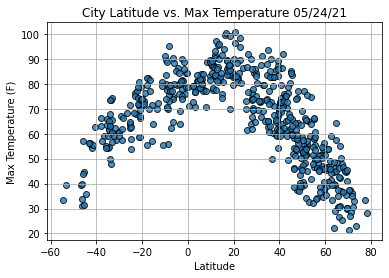

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

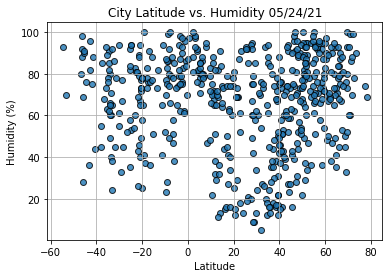

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

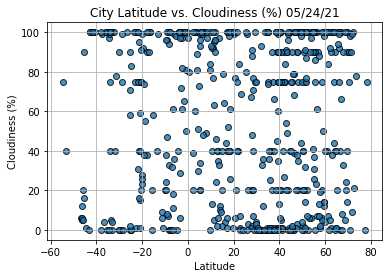

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

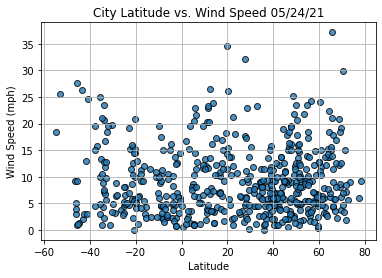

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()